In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
from pprint import pprint
import numpy as np
import json
import censusgeocode as cg
import matplotlib.pyplot as plt


In [4]:
#Merge the Datasets
la_restaurants=pd.read_csv("LA_County_Resturants_CensusTracts.csv")
census_tract= pd.read_csv('2015_census_tract_data.csv')
la_census_tract=census_tract.loc[census_tract["County"]=="Los Angeles",:]
df = pd.merge(la_restaurants, la_census_tract, how='left', on='CensusTract')
df.to_csv('kaggle_census.csv')
#df.count()

In [6]:
#df.count()

In [7]:
df.head()
clean_df=df[['CensusTract','name','category1','price','rating','review_count','city','zipcode',
             'Hispanic','White','Black','Native','Asian','Pacific',
            'Income','IncomePerCap', 'Poverty','County']]

In [8]:
clean_df.head()
clean_census_file=clean_df.dropna(how="any")

In [13]:
#clean_census_file.count()
clean_census_file.head()
#clean_census_file.to_csv('kaggle_restaurant_merge2.csv')

,CensusTract,name,category1,price,rating,review_count,city,zipcode,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Poverty,County
0,6.03723e+09,Fettes Schwein Food Truck,Food Trucks,$,4.5,14,Los Angeles,90011.0,90.1,2.0,5.0,0.0,0.0,2.6,26200.0,8574.0,50.5,Los Angeles
1,6.03719e+09,The Tropic Truck,Food Trucks,$$,4.0,50,Los Angeles,90027.0,42.5,39.5,3.5,0.0,12.6,0.0,27891.0,17794.0,28.1,Los Angeles
2,6.03714e+09,Okamoto Kitchen,Food Trucks,$$,4.5,168,Los Angeles,91423.0,8.9,70.6,8.4,0.0,8.5,0.0,85294.0,68630.0,6.6,Los Angeles
3,6.03721e+09,White Rabbit Truck,Filipino,$,3.5,569,Los Angeles,90012.0,61.3,14.4,17.0,0.0,4.5,0.0,10598.0,4693.0,91.8,Los Angeles
4,6.03712e+09,Shawarma and Falafel Palace Food Truck,Food Trucks,$,1.0,1,Los Angeles,91352.0,81.7,8.4,0.2,0.1,6.3,0.0,55457.0,15980.0,9.8,Los Angeles


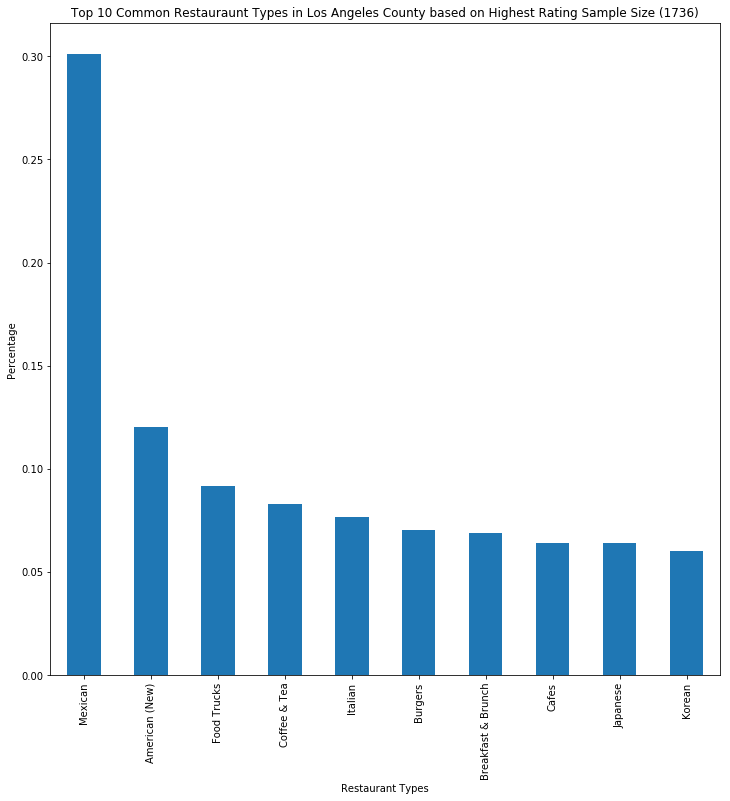

In [12]:
la_df=clean_census_file.groupby("category1")
la=la_df["County"].count()
la=la.sort_values(ascending=False)
la=la/la.sum()
la=pd.DataFrame(la)
la=la.iloc[0:10]
# div=div.loc[div["County"]>=0.02]
total=la["County"].sum()
la=la["County"]/total
la=pd.DataFrame(la)



chart_diverse=la["County"].plot(kind='bar',figsize=(12,12))

chart_diverse.set_xlabel("Restaurant Types")
chart_diverse.set_ylabel("Percentage") 
chart_diverse.set_title(f"Top 10 Common Restauraunt Types in Los Angeles County based on Highest Rating Sample Size ({clean_census_file['name'].count()})")
plt.savefig("Top10LAtype.png")
plt.show()